<a href="https://colab.research.google.com/github/Nandini37/Python_ML_AI/blob/main/Crab_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'playground-series-s3e16:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F51983%2F5884542%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240910%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240910T165525Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6e9c50604173f8998e764bedf61b1db3a462675152fe837d6e09d4e43fa462fd436550bdcd3db50ba0f809a9c6a509e54cd9cae171735b04baa2fa0ef5b6c39c4de1d9e6e788a9fec336ee6ba32eba0982a8556d4bd751d09f99820eb585059014185ca94b52df861ce3494b478339fa6545be317b3519358d0946c36620b47cb7a64ebff2ce18de7dd02123c35c9f6f18bc419baf421778727dc229f452600e7a245473c062061e1e1981f37a43d56c33efcdaeb34bc001382787f8e7269de5c3017ee9efe5a267da9bf6b40aa33d89c474e5ad6d23c5cc3e6015eb69bc1c86106aad9b2d9e8fae4ba26ec62e0e7d81c7516f9eefc245990312d54267da9f4f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2783024 bytes downloaded
Downloaded and uncompressed: playground-series-s3e16
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('/kaggle/input/playground-series-s3e16/train.csv')

In [5]:
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(74051, 10)

In [17]:
columnslist = df.columns.to_list()

for col in columnslist:
    print(col, df[col].duplicated().sum()/df.shape[0])

id 0.0
Sex 0.9999594873803189
Length 0.9980553942553105
Diameter 0.9983524867996381
Height 0.9991222265735776
Weight 0.9581909764891764
Shucked Weight 0.9761515712144333
Viscera Weight 0.9869414322561478
Shell Weight 0.98584759152476
Age 0.9996218822163104


In [39]:
# prompt: Create correalation matrix

corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [27]:

# Initialize LabelEncoder
label_encoder = LabelEncoder()

,count
Sex,
M,27084
I,23957
F,23010


In [38]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = label_encoder.fit_transform(df[col])

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


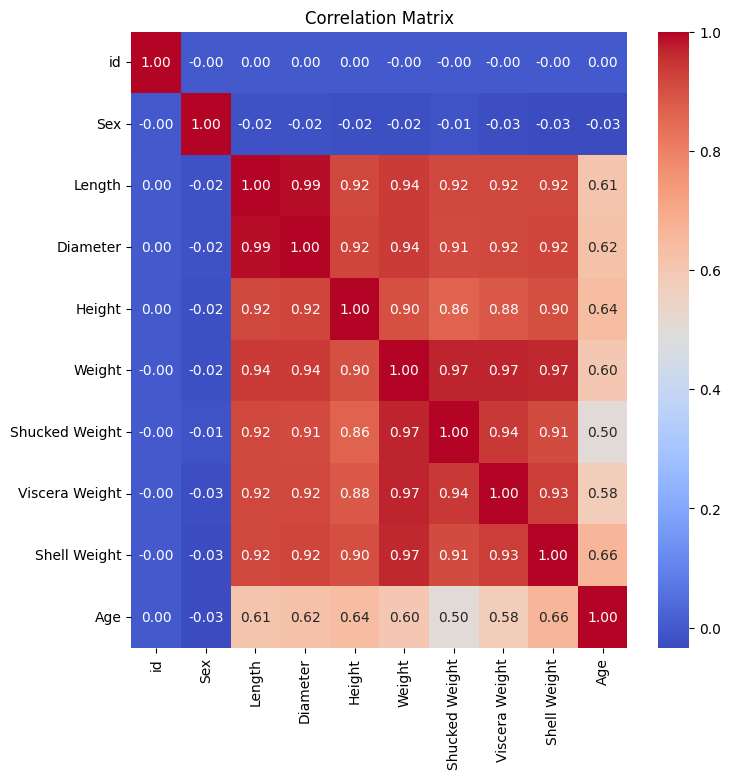

In [46]:
# prompt: Create correalation matrix

corr_matrix = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [58]:
# prompt: Generate data using the above df

from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('Age', axis=1)
y = df['Age']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4.643951180698983


In [ ]:
#MSE of 4.6 is poor.